In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as plt2
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, plot_roc_curve, roc_auc_score
from sklearn.svm import SVC

In [9]:
columns = ['ID', 'Diagnosis', 'Radius', 'Texture', 'Perimeter', 'Area',
           'Smoothness', 'Compactness', 'Concavity', 'Concave points',
           'Symmetry', 'Fractal dimension']

df = pd.read_csv('wdbc.data', index_col=0, usecols=range(12), names=columns)

X = df.drop('Diagnosis', axis=1).values
y = df['Diagnosis'].values
X = StandardScaler().fit_transform(X)

diagnoses = ['B', 'M']
encode = {diagnoses[i]: i for i in range(len(diagnoses))}

y = [encode[val] for val in y]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)


In [10]:
y_train = np.array(y_train, dtype=float)
y_test = np.array(y_test, dtype=float)

In [11]:
X_train.shape

(426, 10)

In [19]:
model = keras.Sequential(
    [
        layers.Dense(16, input_shape=(X_train.shape[1],), activation="relu"),
        layers.Dense(8, input_shape=(X_train.shape[1],), activation="relu"),
        layers.Dense(1, activation='sigmoid'),
    ]
)

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), 
              metrics=['binary_accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
14/14 [==============================] - 0s 4ms/step - loss: 0.4099 - binary_accuracy: 0.8380 - val_loss: 0.2252 - val_binary_accuracy: 0.9231
Epoch 2/20
14/14 [==============================] - 0s 1ms/step - loss: 0.1579 - binary_accuracy: 0.9343 - val_loss: 0.1866 - val_binary_accuracy: 0.9231
Epoch 3/20
14/14 [==============================] - 0s 1ms/step - loss: 0.1383 - binary_accuracy: 0.9413 - val_loss: 0.2047 - val_binary_accuracy: 0.9161
Epoch 4/20
14/14 [==============================] - 0s 1ms/step - loss: 0.1281 - binary_accuracy: 0.9484 - val_loss: 0.1672 - val_binary_accuracy: 0.9301
Epoch 5/20
14/14 [==============================] - 0s 1ms/step - loss: 0.1174 - binary_accuracy: 0.9554 - val_loss: 0.1613 - val_binary_accuracy: 0.9301
Epoch 6/20
14/14 [==============================] - 0s 1ms/step - loss: 0.1087 - binary_accuracy: 0.9577 - val_loss: 0.1695 - val_binary_accuracy: 0.9301
Epoch 7/20
14/14 [==============================] - 0s 1ms/step - loss: 0.12

5/5 [==============================] - 0s 434us/step


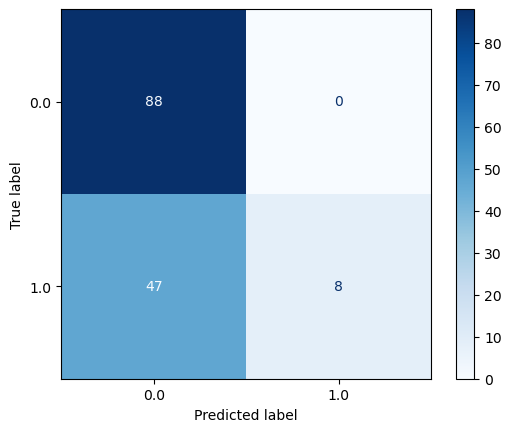

              precision    recall  f1-score   support

           0       1.00      0.65      0.79       135
           1       0.15      1.00      0.25         8

    accuracy                           0.67       143
   macro avg       0.57      0.83      0.52       143
weighted avg       0.95      0.67      0.76       143



In [20]:
y_pred = model.predict(X_test)
y_pred = [int(y) for y in y_pred]
conf = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues');
plt.show()
print(classification_report(y_pred, y_test))

14/14 [==============================] - 0s 413us/step


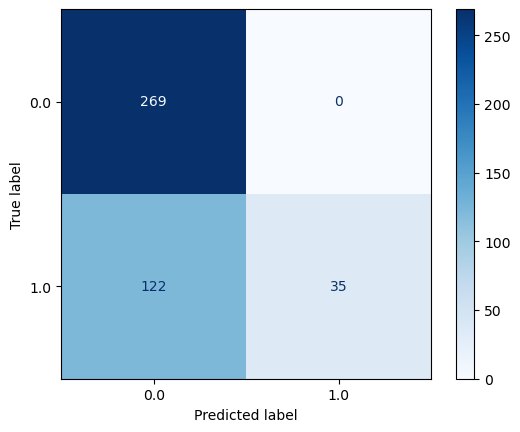

              precision    recall  f1-score   support

           0       1.00      0.69      0.82       391
           1       0.22      1.00      0.36        35

    accuracy                           0.71       426
   macro avg       0.61      0.84      0.59       426
weighted avg       0.94      0.71      0.78       426



In [21]:
y_pred = model.predict(X_train)
y_pred = [int(y) for y in y_pred]
conf = ConfusionMatrixDisplay.from_predictions(y_train, y_pred, cmap='Blues');
plt.show()
print(classification_report(y_pred, y_train))